<a href="https://colab.research.google.com/github/Rushi12bhalkar/Titanic-Survival-Case-Study-4/blob/main/Titanic_Shep_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Case Study 4: - Titanic Ship  

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

ds = pd.read_csv(r'/content/tested.csv')

# Basic information on dataset

print(ds.shape)
print(ds.head(10))
print(ds.tail(10))
print(ds.info())
print(ds.dtypes)


(418, 12)
   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0          892         0       3  ...   7.8292   NaN         Q
1          893         1       3  ...   7.0000   NaN         S
2          894         0       2  ...   9.6875   NaN         Q
3          895         0       3  ...   8.6625   NaN         S
4          896         1       3  ...  12.2875   NaN         S
5          897         0       3  ...   9.2250   NaN         S
6          898         1       3  ...   7.6292   NaN         Q
7          899         0       2  ...  29.0000   NaN         S
8          900         1       3  ...   7.2292   NaN         C
9          901         0       3  ...  24.1500   NaN         S

[10 rows x 12 columns]
     PassengerId  Survived  Pclass  ...      Fare Cabin  Embarked
408         1300         1       3  ...    7.7208   NaN         Q
409         1301         1       3  ...   13.7750   NaN         S
410         1302         1       3  ...    7.7500   NaN         Q
411      

In [ ]:
# statistical information

print(ds.describe())

# find missing values

print(ds.isnull().sum())

# count the occurance of
 
print(ds['Sex'].value_counts())
print(ds['Survived'].value_counts())
print(ds['Pclass'].value_counts())
print(ds['Embarked'].value_counts())


       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   418.000000  418.000000  418.000000  ...  418.000000  418.000000  417.000000
mean   1100.500000    0.363636    2.265550  ...    0.447368    0.392344   35.627188
std     120.810458    0.481622    0.841838  ...    0.896760    0.981429   55.907576
min     892.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     996.250000    0.000000    1.000000  ...    0.000000    0.000000    7.895800
50%    1100.500000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%    1204.750000    1.000000    3.000000  ...    1.000000    0.000000   31.500000
max    1309.000000    1.000000    3.000000  ...    8.000000    9.000000  512.329200

[8 rows x 7 columns]
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked     

<BarContainer object of 3 artists>

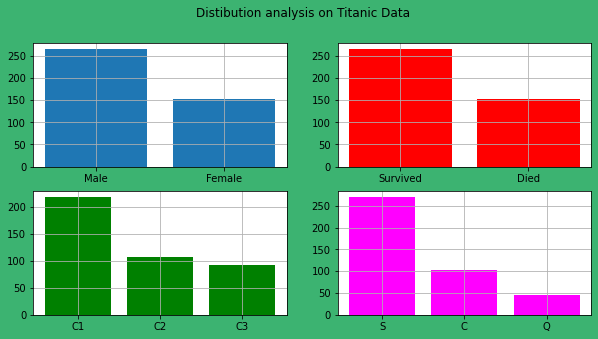

In [ ]:
# distribution analysis

gender_data=ds['Sex'].value_counts()
survived_data=ds['Survived'].value_counts()
pclass_data=ds['Pclass'].value_counts()
embarked_data=ds['Embarked'].value_counts()


gender_label=['Male','Female']
survived_label=['Survived','Died']
pclass_label=['C1','C2','C3']
embarked_label=['S','C','Q']

plt.figure(figsize=(10,5),facecolor='mediumseagreen')

plt.suptitle('Distibution analysis on Titanic Data')
plt.subplot(2,2,1)
plt.grid(True)
plt.bar(gender_label,gender_data)

plt.subplot(2,2,2)
plt.grid(True)
plt.bar(survived_label,survived_data,color='red')

plt.subplot(2,2,3)
plt.grid(True)
plt.bar(pclass_label,pclass_data,color='green')

plt.subplot(2,2,4)
plt.grid(True)
plt.bar(embarked_label,embarked_data,color='Magenta')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Survival based on embarking point.')

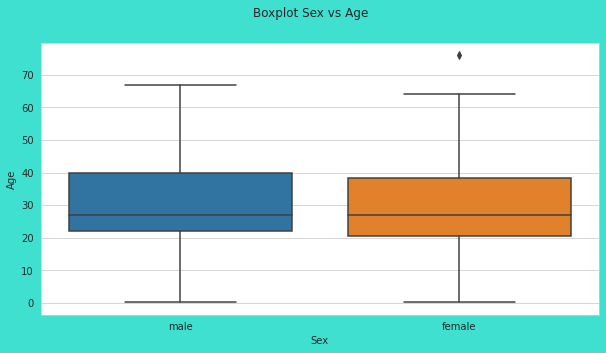

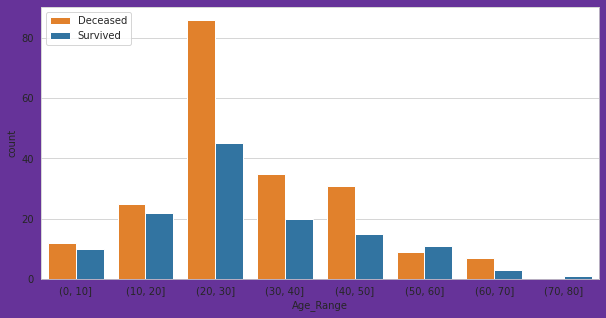

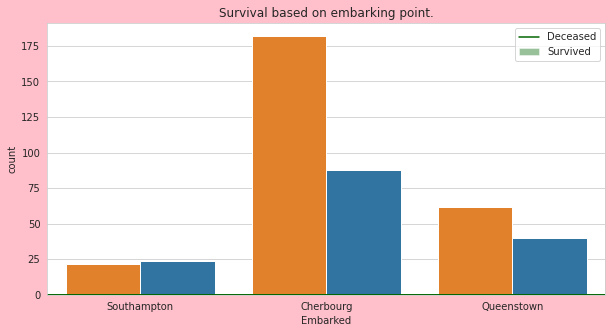

In [ ]:
plt.figure(figsize=(10,5),facecolor='turquoise')  
plt.suptitle('Boxplot Sex vs Age')  
sns.boxplot(x='Sex',y='Age',data=ds)    

plt.figure(figsize=(10,5),facecolor='rebeccapurple')   
ds['Age_Range'] = pd.cut(ds.Age, [0, 10, 20, 30, 40, 50, 60, 70, 80])
sns.set_style('whitegrid')
sns.countplot(x = "Age_Range", hue = "Survived", \
              data = ds, palette=["C1", "C0"]).\
              legend(labels = ["Deceased", "Survived"])

plt.figure(figsize=(10,5),facecolor='pink')
sns.distplot(ds['Age'].dropna(),color='darkgreen',bins=30)

p = sns.countplot(x = "Embarked", hue = "Survived", data = ds, palette=["C1", "C0"])
p.set_xticklabels(["Southampton","Cherbourg","Queenstown"])
p.legend(labels = ["Deceased", "Survived"])
p.set_title("Survival based on embarking point.")


In [ ]:
# Case Study 4 : Titanic Passenger Survival
# predictive analysis starts

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

ds = pd.read_csv(r'/content/tested.csv')
# find missing values in dataset
print(ds.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [23]:
# Replace missing values
ds['Age'].fillna(ds['Age'].mean(), inplace=True)
print(ds.isnull().sum())


# Drop the column not important for ML
ds = ds.drop(columns= ['Cabin'], axis=1)
ds = ds.drop(columns= ['Fare'], axis=1)

# input variables - sex, age, pclass, embarked
# output variable - survived
# Data transformation Categorical to Numeric - Sex and Embarked
print(ds.dtypes)
ds.replace({'Sex':{'male':0,'female':1}, \
                      'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)
print(ds.dtypes)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Embarked       0
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Embarked         int64
dtype: object
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Embarked         int64
dtype: object


In [24]:
# actual ML starts
# Split dataset into input and output variables
X = ds.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)  # input
y = ds['Survived'] # output

print(X.head()) # 418 - six input variables
print(y.head()) # 418 - only survived variables

X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=1)

# X_train (6 var), Y_train(1) - 335
# X_test (6 var), Y_test(1) - 83

model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

tr_prediction = model.predict(X_train)
tr_accuracy = accuracy_score(Y_train, tr_prediction)
print('Accuracy score of training data : ', tr_accuracy*100)

ts_prediction = model.predict(X_test)
ts_accuracy = accuracy_score(Y_test, ts_prediction)
print('Accuracy score of testing data : ', ts_accuracy*100)

print(X.info())

# manual testing prediction
# Testing with input data
input_data = ( 3,1,22.0,1,1,0) # tuple
array = np.asarray(input_data)
print(array)

# convert it to array of array or 2 D array
reshaped = array.reshape(1,-1) # row, column
print(reshaped)

prediction = model.predict(reshaped)
print(prediction)

if prediction[0] == 0:
    print('Dead')
else:
    print('Survived')    



   Pclass  Sex   Age  SibSp  Parch  Embarked
0       3    0  34.5      0      0         2
1       3    1  47.0      1      0         0
2       2    0  62.0      0      0         2
3       3    0  27.0      0      0         0
4       3    1  22.0      1      1         0
0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64
Accuracy score of training data :  100.0
Accuracy score of testing data :  100.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Embarked  418 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 19.7 KB
None
[ 3.  1. 22.  1.  1.  0.]
[[ 3.  1. 22.  1.  1.  0.]]
[1]
Survived


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
